In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  


In [92]:
data=pd.read_csv('healthcare_data_with_outliers.csv')
data

,HeartRate,BloodPressure,Condition
0,98,90,Normal
1,88,116,Normal
2,74,94,Normal
3,67,99,Normal
4,80,96,Normal
...,...,...,...
95,49,169,Disease
96,49,169,Disease
97,142,169,Disease
98,49,78,Disease


In [93]:
features = ['HeartRate', 'BloodPressure']

In [94]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [95]:
df = data.copy()
df[features] = scaler.fit_transform(data[features])

In [96]:
df

,HeartRate,BloodPressure,Condition
0,1.131029,-0.920750,Normal
1,0.551014,0.407009,Normal
2,-0.261007,-0.716480,Normal
3,-0.667017,-0.461141,Normal
4,0.087002,-0.614344,Normal
...,...,...,...
95,-1.711044,3.113597,Disease
96,-1.711044,3.113597,Disease
97,3.683094,3.113597,Disease
98,-1.711044,-1.533562,Disease


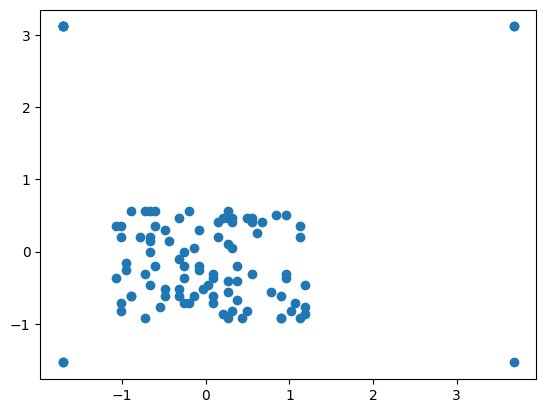

In [97]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [98]:
from sklearn.ensemble import IsolationForest

In [99]:
# Select only the standardized numerical features for training
X = df[['HeartRate', 'BloodPressure']]

# Fit Isolation Forest
clf = IsolationForest(contamination='auto')
clf.fit(X)

# Predict outliers
predictions = clf.predict(X)

In [100]:
predictions

array([-1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [101]:
index=np.where(predictions<0)
index

(array([ 0,  5, 12, 20, 32, 35, 50, 52, 59, 68, 77, 82, 90, 91, 92, 93, 94,
        95, 96, 97, 98, 99]),)

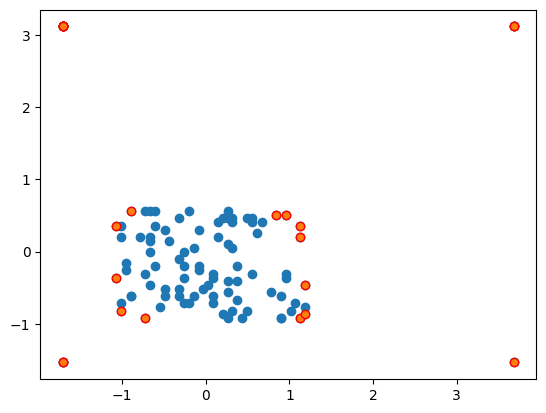

In [102]:
index=np.where(predictions<0)
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors='r')

# Detection in case of DBSCAN


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons ##for non linear data
from sklearn.datasets import make_circles
%matplotlib inline

In [145]:
X,y=make_circles(n_samples=750,factor=0.3,noise=0.1)

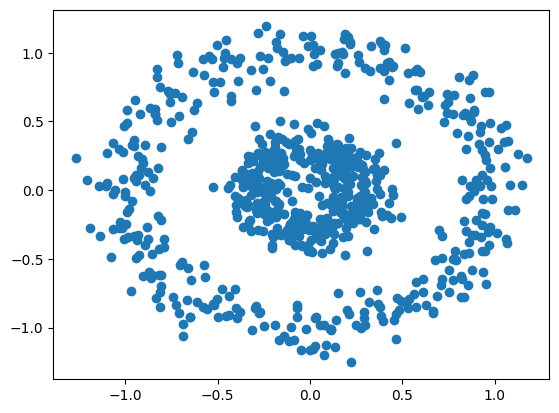

In [146]:
plt.scatter(X[:,0],X[:,1])

In [147]:
from sklearn.cluster import DBSCAN

In [148]:
dbscan=DBSCAN(eps=0.10)

In [149]:
dbscan.fit(X)

DBSCAN(eps=0.1)

In [150]:
dbscan.labels_

array([ 0,  1,  0,  2,  0,  0,  0,  0,  3,  2, 10,  0,  4,  0, -1,  0,  2,
        2,  5,  6,  4,  2,  0,  1,  0,  0,  1,  5,  4,  6,  0,  2,  2,  2,
        2,  0,  1,  0,  1,  5,  0, -1,  0,  0,  0,  0,  6,  2,  8,  0,  2,
        0,  0,  5,  0,  0,  2,  6,  5,  1,  2,  0,  6,  4,  0,  0,  2,  0,
        1,  0,  8,  0,  0,  0,  0,  3,  0,  0,  5,  1,  2,  0,  0,  0,  0,
        2,  6,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  5,  3,  6,  9,
        0,  2,  0,  0,  0,  1,  0,  1,  0,  6,  0,  0,  0,  4,  0,  2,  0,
        0,  0,  5, -1,  0,  4,  0,  0,  0,  0,  0,  3,  5, -1,  1,  0,  5,
        2,  0,  0,  3,  2, -1,  0,  5,  0,  0,  3,  1,  0,  5,  2,  2,  0,
        1,  0,  2,  7,  6,  0,  0,  0,  0,  0,  0, -1,  0, -1,  7, -1,  0,
        0,  0,  0,  6,  0,  0,  2,  5,  2,  0,  0,  0,  2,  5,  0,  0,  0,
        0,  2,  0,  5,  2,  0, -1,  0,  0,  0,  2,  0, -1,  5,  1,  1,  5,
        0,  0,  7,  0,  0,  0,  0,  0, -1,  0,  5,  0,  0,  5,  2,  0,  2,
        3,  0,  1,  2,  8

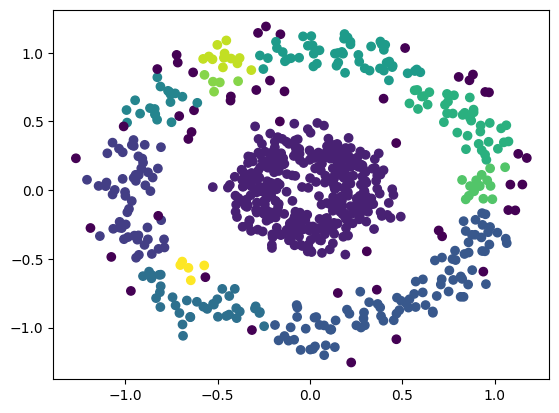

In [151]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

In [152]:
#got the outliers important for or business problem

# Local Outlier Factor Anomaly Detection

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


In [159]:

# Load the dataset
df = pd.read_csv("lof_dataset.csv")
df

,Feature1,Feature2
0,-7.338988,-7.729954
1,-7.740041,-7.264665
2,-1.686653,7.793442
3,4.422198,3.071947
4,-8.917752,-7.888196
...,...,...
315,-8.805519,4.264291
316,-1.088983,5.435792
317,2.041144,-2.111606
318,7.023299,-8.493501


In [161]:

# Extract features
X = df[['Feature1', 'Feature2']]

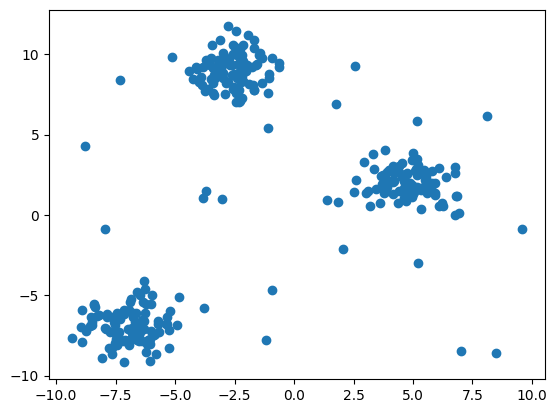

In [163]:
plt.scatter(X.values[:, 0], X.values[:, 1])


In [164]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X) 


In [165]:
df['LOF_Prediction'] = y_pred

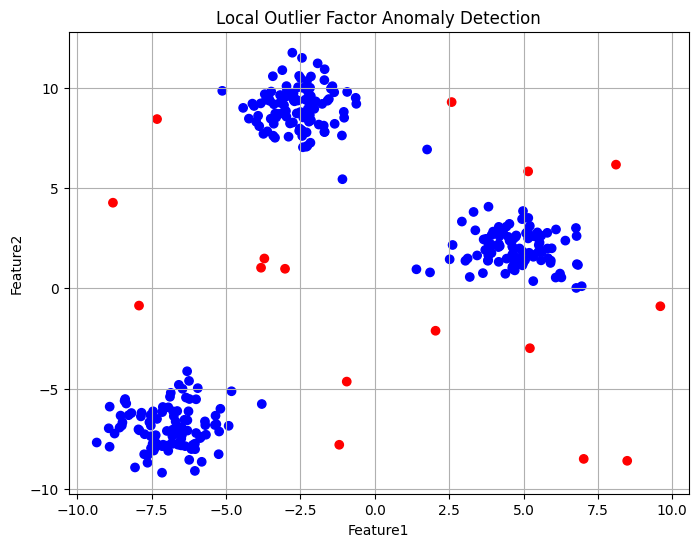

In [166]:

plt.figure(figsize=(8, 6))
colors = df['LOF_Prediction'].map({1: 'blue', -1: 'red'})
plt.scatter(df['Feature1'], df['Feature2'], c=colors)
plt.title("Local Outlier Factor Anomaly Detection")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.grid(True)
plt.show()
